In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [5]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [7]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [ ]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

<BarContainer object of 2 artists>

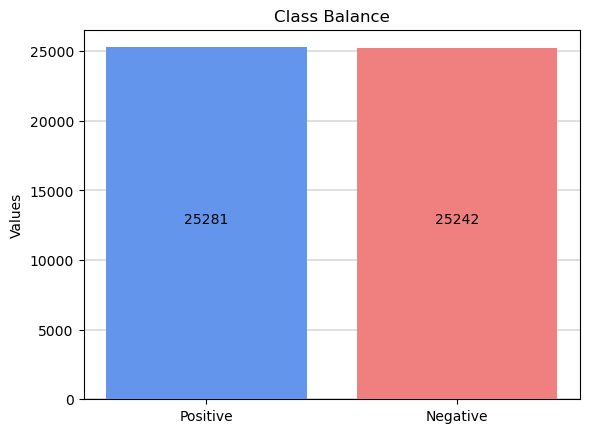

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',zorder=4)

# Count the values in the 'Label' column
count = df['Label'].value_counts()
x = ["Positive", "Negative"]  # Custom labels for class balance plot
y = [count[1], count[0]]
addlabels(x,y)
plt.ylabel("Values")
plt.title('Class Balance')
plt.grid(color='dimgray', linewidth=0.3, axis='y',zorder=0)
plt.bar(x,y, color= ['cornflowerblue', 'lightcoral'], zorder=3)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF bigram(2,2)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(2,2), max_df=0.7, max_features=10000)

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [15]:
#Split data 90% data train and 10% data test
x_bigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_bigram,label, test_size = 0.1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(45470, 10000) (45470,)
(5053, 10000) (5053,)


In [16]:
y_train

24150    1
36548    1
13580    0
45316    1
41255    0
        ..
295      0
31416    0
45489    1
2832     1
10937    0
Name: Label, Length: 45470, dtype: int64

In [19]:
x_train

0     1     2     3     4     5     6     7     8     9     ...  9990  \
24150   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
36548   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
13580   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
45316   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
41255   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
295     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
31416   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
45489   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2832    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10937   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       9991  9992  9993  9994  9995  9996  9997  9998  9999  
24150   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
36548   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
13580   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
45316   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
41255   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
295     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
31416   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
45489   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2832    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
10937   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[45470 rows x 10000 columns]

In [21]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [22]:
x_train.shape

(45470, 1, 10000)

In [25]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d               │ (None, 1, 10000)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     5,186,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,190,209 (19.80 MB)

 Trainable params: 5,190,209 (19.80 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.7221 - loss: 0.5310 - val_accuracy: 0.7835 - val_loss: 0.4145
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.7985 - loss: 0.3932 - val_accuracy: 0.7871 - val_loss: 0.4070
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 75s 53ms/step - accuracy: 0.7991 - loss: 0.3760 - val_accuracy: 0.7827 - val_loss: 0.4082
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.8088 - loss: 0.3631 - val_accuracy: 0.7809 - val_loss: 0.4085
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.8162 - loss: 0.3505 - val_accuracy: 0.7817 - val_loss: 0.4094


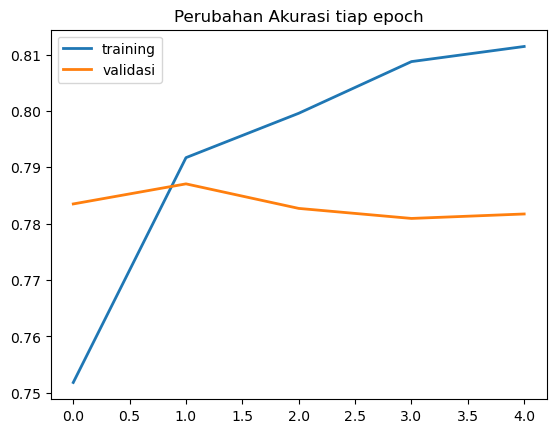

158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.798065  0.752778  0.774760      2520
           1   0.767190  0.810501  0.788251      2533

    accuracy                       0.781714      5053
   macro avg   0.782627  0.781640  0.781506      5053
weighted avg   0.782588  0.781714  0.781523      5053



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_1             │ (None, 1, 10000)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │     5,186,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,190,209 (19.80 MB)

 Trainable params: 5,190,209 (19.80 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 78s 51ms/step - accuracy: 0.7262 - loss: 0.5289 - val_accuracy: 0.7791 - val_loss: 0.4125
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.7911 - loss: 0.3981 - val_accuracy: 0.7829 - val_loss: 0.4029
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.8022 - loss: 0.3728 - val_accuracy: 0.7811 - val_loss: 0.4072
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 75s 53ms/step - accuracy: 0.8112 - loss: 0.3616 - val_accuracy: 0.7805 - val_loss: 0.4105
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 76s 54ms/step - accuracy: 0.8137 - loss: 0.3525 - val_accuracy: 0.7833 - val_loss: 0.4122


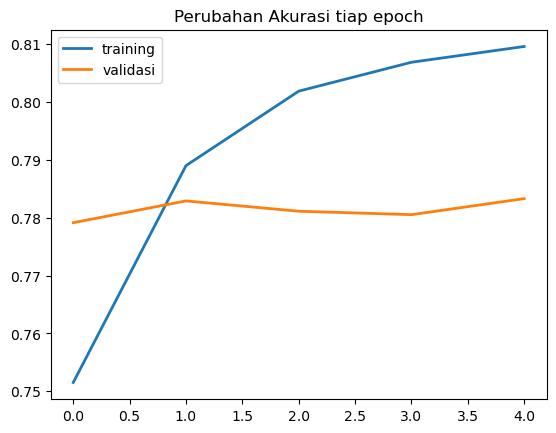

158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.796258  0.759921  0.777665      2520
           1   0.771526  0.806553  0.788651      2533

    accuracy                       0.783297      5053
   macro avg   0.783892  0.783237  0.783158      5053
weighted avg   0.783860  0.783297  0.783172      5053



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_2             │ (None, 1, 10000)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │     5,186,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,190,209 (19.80 MB)

 Trainable params: 5,190,209 (19.80 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 72s 49ms/step - accuracy: 0.7076 - loss: 0.5338 - val_accuracy: 0.7878 - val_loss: 0.4146
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 74s 52ms/step - accuracy: 0.7911 - loss: 0.4012 - val_accuracy: 0.7882 - val_loss: 0.4051
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.8051 - loss: 0.3774 - val_accuracy: 0.7861 - val_loss: 0.4051
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.8151 - loss: 0.3576 - val_accuracy: 0.7873 - val_loss: 0.4082
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 87s 61ms/step - accuracy: 0.8137 - loss: 0.3573 - val_accuracy: 0.7853 - val_loss: 0.4114


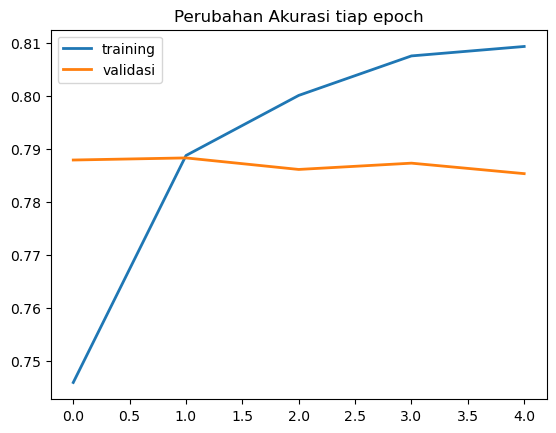

158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.786427  0.781746  0.784080      2520
           1   0.784144  0.788788  0.786459      2533

    accuracy                       0.785276      5053
   macro avg   0.785286  0.785267  0.785269      5053
weighted avg   0.785283  0.785276  0.785273      5053



In [29]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [31]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.783428986080876
Average Precision : 0.7742866474451212
Average Recall    : 0.8019476246874588
Average F1-Score  : 0.787787100619659
